## Machine Learning Model of X-ray image classfication 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io

In [14]:
class Image:
    def __init__(self, image_file):
        self.image_file = image_file
        self.img = io.imread(self.image_file)
        
    def image_plt(self):
        implot = plt.imshow(self.img, cmap="gray")
        plt.show()
        
    def image_1D(self):
        image_1D = self.img.flatten()[:100000].tolist()
        return image_1D

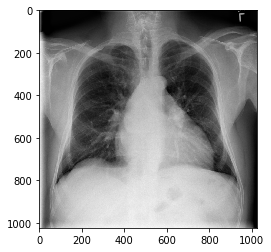

In [15]:
image1 = Image('/Users/pengxu/Data/images/00000001_000.png')
image1.image_plt()

#### No Finding      60361
#### Infiltration     9547
#### Atelectasis      4215
#### Effusion         3955
#### Nodule           2705
#### Pneumothorax     2194
#### Mass             2139

Text(0.5, 1.0, 'Top 7 labels in X-ray image dataset')

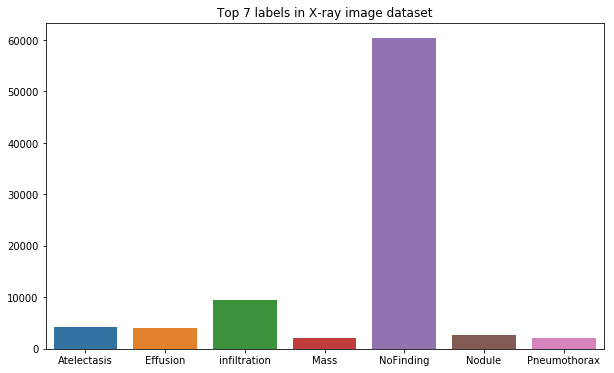

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
top_disease = {'samples_numb':[4215,3955,9547,2139,60361,2705,2194],
               'label':['Atelectasis', 'Effusion', 'infiltration','Mass', 'NoFinding','Nodule','Pneumothorax']}
plt.figure(figsize=(10, 6))
sns.barplot(x="label", y="samples_numb", data=top_disease)
plt.title('Top 7 labels in X-ray image dataset')

In [32]:
from sklearn.decomposition import PCA

class PCA_image:
    
    def __init__(self, percentage, image):
        self.percentage = percentage
        self.image = image
        
        img = io.imread(self.image)
        self.img = img
        
        pca = PCA(self.percentage)
        pca.fit(img)
        
        components = pca.transform(img)
        approxOriginal = pca.inverse_transform(components)
        self.approxOriginal = approxOriginal
        
        pca_components = pca.n_components_
        self.pca_components = pca_components
    
    def plot(self):
        plt.imshow(self.approxOriginal,
                   cmap = "gray", 
                   interpolation='nearest',
                   clim=(0, 255));
        
        plt.xlabel(f'{self.pca_components} Components', fontsize = 12)
        plt.title(f'{100* self.percentage}% of Explained Variance', fontsize = 14);

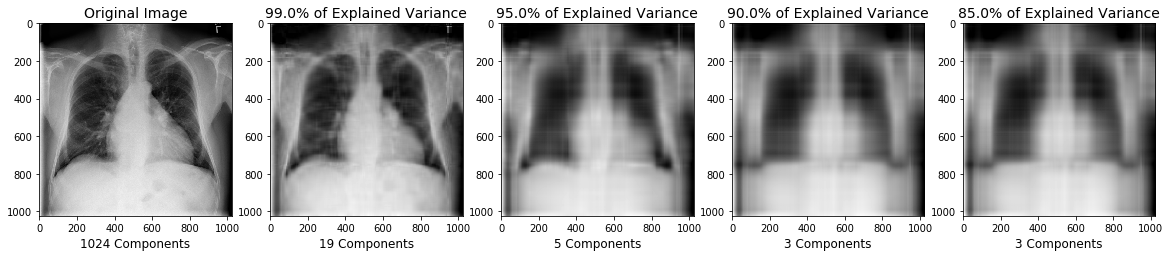

In [34]:
image_1 = '/Users/pengxu/Data/images/00000001_000.png'

plt.figure(figsize=(20,4))

plt.subplot(1, 5, 1)
img = io.imread(image_1)
plt.imshow(img,cmap = "gray", interpolation='nearest',clim=(0, 255));
plt.xlabel('1024 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

plt.subplot(1, 5, 2)
image_pca = PCA_image(0.99, image_1)
image_pca.plot()

plt.subplot(1, 5, 3)
image_pca = PCA_image(0.95, image_1)
image_pca.plot()

plt.subplot(1, 5, 4)
image_pca = PCA_image(0.90, image_1)
image_pca.plot()

plt.subplot(1, 5, 5)
image_pca = PCA_image(0.85, image_1)
image_pca.plot()

In [36]:
table = "/Users/pengxu/Data/Data_Entry_Table.csv"
df = pd.read_csv(table)
df.head(5)

,Unnamed: 0,ImageIndex,FindingLabels,Follow-up,PatientID,PatientAge,PatientGender,ViewPosition,ImageWidth,ImageHeight,ImagePixelSpacingX,ImagePixelSpacingY,ImagePath
0,0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,/Users/pengxu/Data/images/00000001_000.png
1,1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,/Users/pengxu/Data/images/00000001_001.png
2,2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,/Users/pengxu/Data/images/00000001_002.png
3,3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,/Users/pengxu/Data/images/00000002_000.png
4,4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,/Users/pengxu/Data/images/00000003_000.png


In [37]:
dise_list = ['No Finding', 'Infiltration', 'Atelectasis', 'Effusion', 'Nodule', 'Pneumothorax', 'Mass']

table_no_finding = df[df['FindingLabels'] == 'No Finding']
table_infiltration = df[df['FindingLabels'] == 'Infiltration']

## Experiments 1
### 1. Prepare the table
- Male, Age>50, and ViewPosition PA for each lung disease

In [74]:
#create the tabels for each disease with gender(sex), age(>50) and view(PA)
no_find_table = df[(df['FindingLabels'] == 'No Finding') &
                       (df['PatientGender']=='M') &
                       (df['ViewPosition'] =='PA') &
                       (df['PatientAge'] > 50)]
infiltration_table = df[(df['FindingLabels'] == 'Infiltration') &
                       (df['PatientGender']=='M') &
                       (df['ViewPosition'] =='PA') &
                       (df['PatientAge'] > 50)]
atelectasis_table = df[(df['FindingLabels'] == 'Atelectasis') &
                       (df['PatientGender']=='M') &
                       (df['ViewPosition'] =='PA') &
                       (df['PatientAge'] > 50)]
effusion_table = df[(df['FindingLabels'] == 'Effusion') &
                       (df['PatientGender']=='M') &
                       (df['ViewPosition'] =='PA') &
                       (df['PatientAge'] > 50)]
nodule_table = df[(df['FindingLabels'] == 'Nodule') &
                       (df['PatientGender']=='M') &
                       (df['ViewPosition'] =='PA') &
                       (df['PatientAge'] > 50)]
pneumothorax_table = df[(df['FindingLabels'] == 'Pneumothorax') &
                       (df['PatientGender']=='M') &
                       (df['ViewPosition'] =='PA') &
                       (df['PatientAge'] > 50)]
mass_table = df[(df['FindingLabels'] == 'Mass') &
                       (df['PatientGender']=='M') &
                       (df['ViewPosition'] =='PA') &
                       (df['PatientAge'] > 50)]

In [39]:
# no_finding_top100 = no_find_table
# infil_top100 = infiltration_table
# atelectasis_top100 = atelectasis_table
# effusion_top100 = effusion_table
# nodule_top100 = nodule_table
# pneumothorax_top100 = pneumothorax_table
# mass_top100 = mass_table

In [75]:
label = no_find_table['FindingLabels'].to_list()[:100] + \
        infiltration_table['FindingLabels'].to_list()[:100] + \
        atelectasis_table['FindingLabels'].to_list()[:100] +\
        effusion_table['FindingLabels'].to_list()[:100] + \
        nodule_table['FindingLabels'].to_list()[:100] + \
        pneumothorax_table['FindingLabels'].to_list()[:100] + \
        mass_table['FindingLabels'].to_list()[:100]

In [77]:
#check the head and tail
label[:5], label[-5:]

(['No Finding', 'No Finding', 'No Finding', 'No Finding', 'No Finding'],
 ['Mass', 'Mass', 'Mass', 'Mass', 'Mass'])

In [76]:
#check the length
len(label)

700

In [80]:
#Combine the image into one file
image_path = no_find_table['ImagePath'].to_list()[:100] + \
             infiltration_table['ImagePath'].to_list()[:100] + \
             atelectasis_table['ImagePath'].to_list()[:100] +\
             effusion_table['ImagePath'].to_list()[:100] + \
             nodule_table['ImagePath'].to_list()[:100] + \
             pneumothorax_table['ImagePath'].to_list()[:100] + \
             mass_table['ImagePath'].to_list()[:100]

In [79]:
#check the head and tail
image_path[:3], image_path[-3:]

(['/Users/pengxu/Data/images/00000002_000.png',
  '/Users/pengxu/Data/images/00000006_000.png',
  '/Users/pengxu/Data/images/00000007_000.png'],
 ['/Users/pengxu/Data/images/00008746_000.png',
  '/Users/pengxu/Data/images/00008763_004.png',
  '/Users/pengxu/Data/images/00008892_008.png'])

In [45]:
#check the length
len(image_path)

700

### 2. Process image data
### 2. 1 Transform the image data into the arrray

In [46]:
data = []
for i in image_path:
    data.append(Image(i).image_1D())

In [83]:
print(data [1][:50])
len(data)

[18, 29, 27, 26, 26, 24, 23, 23, 22, 23, 22, 21, 21, 20, 19, 18, 18, 18, 16, 16, 17, 16, 15, 14, 15, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 10, 10, 10, 9, 9, 9, 10, 10, 9, 8, 8, 8, 8, 8]


700

In [48]:
img_exp = {'target':label,
          'data':data}

### 2.2 Transform the label y categorial data into numerical data

In [49]:
# Function for OneHotEncorder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(img_exp['target'])
# target variable
y = le.transform(img_exp['target'])

In [92]:
print('lable coder list')
dise_list = ['No Finding', 'Infiltration', 'Atelectasis', 'Effusion', 'Nodule', 'Pneumothorax', 'Mass']
label_encoder = zip(dise_list,le.transform(dise_list))
print(set(label_encoder))

lable coder list
{('Nodule', 5), ('Mass', 3), ('Atelectasis', 0), ('No Finding', 4), ('Infiltration', 2), ('Pneumothorax', 6), ('Effusion', 1)}


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = StandardScaler().fit_transform(img_exp['data'])

In [94]:
X.shape

(700, 100000)

### 3. Split the training data and testing data

In [95]:
# def ml(X, y):
#     from sklearn.model_selection import train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     print(f"X_train, y_train, X_test, y_test, {len(X_train)}, {len(y_train)}, {len(X_test)}, {len(y_test)}")
    
#     from sklearn.decomposition import PCA
#     pca = PCA(.95)
#     pca.fit(X_train)
    
#     train_img = pca.transform(X_train)
#     test_img = pca.transform(X_test)
    
#     print(f"PCA(.95) reduce {X_train.shape[1]} to {train_img.shape[1]} dimensions")
    
#     from sklearn.ensemble import RandomForestClassifier
#     rf = RandomForestClassifier(n_estimators=100, max_features=0.33, n_jobs=-1)
#     rf.fit(X_train, y_train)
#     rf.score(X_test, y_test)

In [96]:
from sklearn.model_selection import train_test_split
X_train, XX_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train, y_train, X_test, y_test, {len(X_train)}, {len(y_train)}, {len(X_test)}, {len(y_test)}")

X_train, y_train, X_test, y_test, 560, 560, 140, 140


### 4. PCA deloyment

In [97]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [98]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

In [99]:
print(f"PCA(.95) reduce {X_train.shape[1]} to {train_img.shape[1]} dimensions")

PCA(.95) reduce 100000 to 42 dimensions


### 5. Train the model
#### 5.1 Train the model 3-fold cross validation

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
rf = RandomForestClassifier(n_estimators=100, max_features=0.33, n_jobs=-1)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [107]:
grid_search.fit(train_img, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.7min finished
/Users/pengxu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [112]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
from sklearn.metrics import accuracy_score
y_pred = best_grid.predict(test_img)
y_test 
accuracy_score(y_test, y_pred)

0.22142857142857142

In [117]:
from sklearn.metrics import classification_report
predicted = best_grid.predict(test_img)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.12      0.10      0.11        21
           1       0.41      0.35      0.38        20
           2       0.27      0.27      0.27        22
           3       0.29      0.35      0.32        20
           4       0.25      0.16      0.20        25
           5       0.12      0.29      0.17        14
           6       0.08      0.06      0.07        18

   micro avg       0.22      0.22      0.22       140
   macro avg       0.22      0.22      0.22       140
weighted avg       0.23      0.22      0.22       140



#### 5.2 Train the model 5-fold cross validation

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
rf = RandomForestClassifier(n_estimators=100, max_features=0.33, n_jobs=-1)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [119]:
grid_search.fit(train_img, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  4.8min finished
/Users/pengxu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [120]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [121]:
from sklearn.metrics import accuracy_score
y_pred = best_grid.predict(test_img)
y_test 
accuracy_score(y_test, y_pred)

0.2

In [122]:
from sklearn.metrics import classification_report
predicted = best_grid.predict(test_img)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.25      0.25      0.25        20
           2       0.28      0.23      0.25        22
           3       0.32      0.30      0.31        20
           4       0.17      0.12      0.14        25
           5       0.11      0.21      0.14        14
           6       0.21      0.33      0.26        18

   micro avg       0.20      0.20      0.20       140
   macro avg       0.19      0.21      0.19       140
weighted avg       0.19      0.20      0.19       140



In [138]:
rp = {'recall_5fold':[0.00,0.25,0.23,0.30,0.12,0.21,0.33],
     'recall_3fold':[0.10,0.35,0.27,0.35,0.16,0.29,0.06],
     'label':['Atelectasis', 'Effusion', 'infiltration','Mass', 'NoLabling','nodule','Pneumothorax']}

In [139]:
rp_df = pd.DataFrame(rp)
rp_df
# sns.barplot(x='label', y='recall',data=rp)
# plt.title('Recall score')

,recall_5fold,recall_3fold,label
0,0.00,0.10,Atelectasis
1,0.25,0.35,Effusion
2,0.23,0.27,infiltration
3,0.30,0.35,Mass
4,0.12,0.16,NoLabling
5,0.21,0.29,nodule
6,0.33,0.06,Pneumothorax


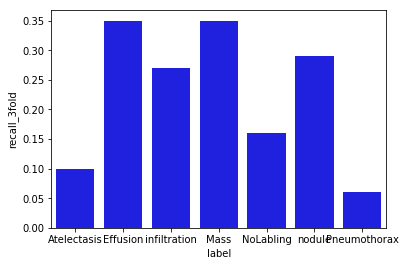

In [145]:
sns.barplot(x='label', y='recall_3fold', data = rp_df, color='b')

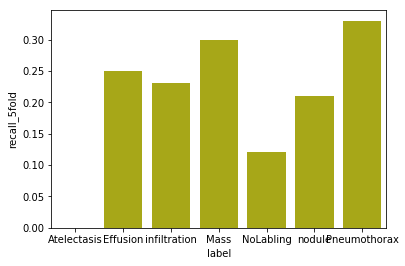

In [144]:
sns.barplot(x='label', y='recall_5fold', data = rp_df, color='y')

In [66]:
from sklearn.metrics import classification_report
predicted = rf.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.18      0.10      0.12        21
           1       0.39      0.35      0.37        20
           2       0.41      0.41      0.41        22
           3       0.40      0.50      0.44        20
           4       0.24      0.16      0.19        25
           5       0.16      0.21      0.18        14
           6       0.14      0.22      0.17        18

   micro avg       0.28      0.28      0.28       140
   macro avg       0.27      0.28      0.27       140
weighted avg       0.28      0.28      0.27       140

